# Plot SSP Climate Scenario

## 1. Import modules

In [1]:
import sys
import os
import platform
import importlib

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation
%matplotlib inline
from matplotlib.ticker import FuncFormatter
from matplotlib import rc
rc('font', family='NanumGothic')

if platform.system() == 'Darwin':  # macOS
    base_FP = '/Users/lsj'
    cpuserver_data_FP = '/Users/lsj/cpuserver_data'

elif  platform.system() == 'Linux':  # Linux

    base_FP = '/home/seongjun/lsj'
    cpuserver_data_FP = '/home/seongjun/cpuserver_data'
    
else:
    base_FP = '/data'
    cpuserver_data_FP = '/data'
    
sys.path.append(base_FP + '/python_modules')

#hydroAI libs
import HydroAI.Data as Data
importlib.reload(Data);

# Ignore runtime warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Set the path for loading data

In [2]:
SSP5_path = os.path.join(base_FP, 'SSP5')
nc_file = 'AR6_SSP585_5ENSMN_skorea_TA_gridraw_yearly_2021_2100.nc'
SSP5_FP = os.path.join(SSP5_path, nc_file)

## 3. Load variables from SSP(.nc file)

### 3.1 Check the variables name

In [3]:
# check the variable names and their units
Data.get_nc_variable_names_units(SSP5_FP)

+-----------+--------------------+-----------------------+
| Name      | Long Name          | Units                 |
+===========+====================+=======================+
| time      |                    | days since 2021-01-01 |
+-----------+--------------------+-----------------------+
| longitude | longitude          | degrees_east          |
+-----------+--------------------+-----------------------+
| latitude  | latitude           | degrees_north         |
+-----------+--------------------+-----------------------+
| TA        | TEMPERATURE OF AIR | degC                  |
+-----------+--------------------+-----------------------+


(['time', 'longitude', 'latitude', 'TA'],
 ['days since 2021-01-01', 'degrees_east', 'degrees_north', 'degC'],
 [None, 'longitude', 'latitude', 'TEMPERATURE OF AIR'])

### 3.2 Define the variables

In [4]:
ds = nc.Dataset(SSP5_FP, 'r')

avg_temp = ds.variables['TA'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time'][:]
time = (time / 360) + 2021

## 4. Calculate mean air temperature for specific areas

### 4.1 Transpose the demensions (lon, lat, time) and remove false values

In [5]:
temp = np.transpose(avg_temp, (1,2,0))
temp[temp<0] = np.nan

### 4.2 Define variables for specific areas

In [6]:
# Seoul latitude and longitude ranges
seoul_lon_range = (126.95, 127.05)
seoul_lat_range = (37.55, 37.65)

# Incheon latitude and longitude ranges
incheon_lon_range = (126.65, 126.75)
incheon_lat_range = (37.45, 37.55)

# Daejeon latitude and longitude ranges
daejeon_lon_range = (127.35, 127.45)
daejeon_lat_range = (36.35, 36.45)

# Busan latitude and longitude ranges
busan_lon_range = (129.05, 129.15)
busan_lat_range = (35.15, 35.25)

# Daegu latitude and longitude ranges
daegu_lon_range = (128.55, 128.65)
daegu_lat_range = (35.85, 35.95)

# Gwangju latitude and longitude ranges
gwangju_lon_range = (126.75, 126.85)
gwangju_lat_range = (35.15, 35.25)

## 4.3 Calculate mean air temperature

In [7]:
# Seoul
seoul_lon_idx = np.where((lon >= seoul_lon_range[0]) & (lon <= seoul_lon_range[1]))[0]
seoul_lat_idx = np.where((lat >= seoul_lat_range[0]) & (lat <= seoul_lat_range[1]))[0]
seoul_temp_subset = temp[seoul_lon_idx, :, :][:, seoul_lat_idx, :]
seoul_mean_temp = np.mean(seoul_temp_subset, axis=(0, 1))

# Incheon
incheon_lon_idx = np.where((lon >= incheon_lon_range[0]) & (lon <= incheon_lon_range[1]))[0]
incheon_lat_idx = np.where((lat >= incheon_lat_range[0]) & (lat <= incheon_lat_range[1]))[0]
incheon_temp_subset = temp[incheon_lon_idx, :, :][:, incheon_lat_idx, :]
incheon_mean_temp = np.mean(incheon_temp_subset, axis=(0, 1))

# Daejeon
daejeon_lon_idx = np.where((lon >= daejeon_lon_range[0]) & (lon <= daejeon_lon_range[1]))[0]
daejeon_lat_idx = np.where((lat >= daejeon_lat_range[0]) & (lat <= daejeon_lat_range[1]))[0]
daejeon_temp_subset = temp[daejeon_lon_idx, :, :][:, daejeon_lat_idx, :]
daejeon_mean_temp = np.mean(daejeon_temp_subset, axis=(0, 1))

# Busan
busan_lon_idx = np.where((lon >= busan_lon_range[0]) & (lon <= busan_lon_range[1]))[0]
busan_lat_idx = np.where((lat >= busan_lat_range[0]) & (lat <= busan_lat_range[1]))[0]
busan_temp_subset = temp[busan_lon_idx, :, :][:, busan_lat_idx, :]
busan_mean_temp = np.mean(busan_temp_subset, axis=(0, 1))

# Daegu
daegu_lon_idx = np.where((lon >= daegu_lon_range[0]) & (lon <= daegu_lon_range[1]))[0]
daegu_lat_idx = np.where((lat >= daegu_lat_range[0]) & (lat <= daegu_lat_range[1]))[0]
daegu_temp_subset = temp[daegu_lon_idx, :, :][:, daegu_lat_idx, :]
daegu_mean_temp = np.mean(daegu_temp_subset, axis=(0, 1))

# Gwangju
gwangju_lon_idx = np.where((lon >= gwangju_lon_range[0]) & (lon <= gwangju_lon_range[1]))[0]
gwangju_lat_idx = np.where((lat >= gwangju_lat_range[0]) & (lat <= gwangju_lat_range[1]))[0]
gwangju_temp_subset = temp[gwangju_lon_idx, :, :][:, gwangju_lat_idx, :]
gwangju_mean_temp = np.mean(gwangju_temp_subset, axis=(0, 1))

### 4.4 Check the values

In [124]:
# Print average temperature for Seoul
print("Average temperature in Seoul:", seoul_mean_temp)

# Print average temperature for Incheon
print("Average temperature in Incheon:", incheon_mean_temp)

# Print average temperature for Daejeon
print("Average temperature in Daejeon:", daejeon_mean_temp)

# Print average temperature for Busan
print("Average temperature in Busan:", busan_mean_temp)

# Print average temperature for Daegu
print("Average temperature in Daegu:", daegu_mean_temp)

# Print average temperature for Gwangju
print("Average temperature in Gwangju:", gwangju_mean_temp)

Average temperature in Seoul: [12.791734931882749 13.599999798230888 14.101654304945765
 14.008263453964359 13.256196329416323 14.145454343685435
 14.302480145919422 12.696692600723141 13.287603709323347
 13.847109455707646 13.389255996577996 13.563635960098141
 13.941325542355372 15.021488410382231 14.195040111699381
 13.757022573928202 14.009090707321798 14.375205804493802
 14.080993147920971 14.09008284639721 14.827274543194731
 14.723964722688534 14.53801531831095 15.049586776859504
 15.056197741800103 15.322315058432334 14.373554324315599
 15.833883490444215 15.02644688629907 14.561155208871384
 14.959507965844525 15.209916548295455 16.22231324251033
 16.059503728693183 15.290908687370868 15.69256137816374
 15.290082442858987 15.398347712745352 14.980167105178202
 15.858675870028408 16.234708927879648 15.619008466231922
 15.847105420325413 16.03718907379907 16.153717797649794 16.3099173553719
 17.58925660188533 17.041324331740704 17.874378551136363
 16.385123765173038 16.270247530

## 5.Plot the graph

### 5.1 English version

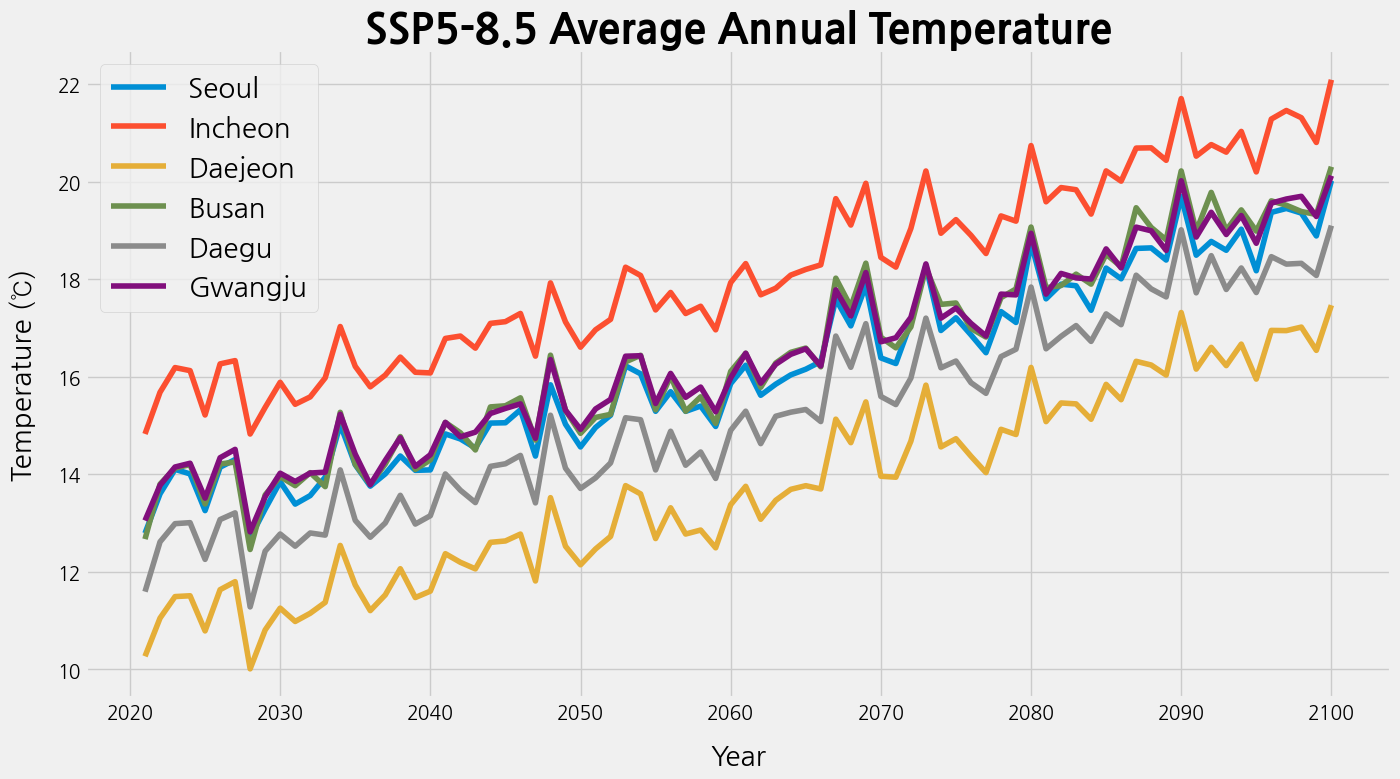

In [24]:
# Change plot style
plt.style.use('fivethirtyeight')
# plt.style.use('default') # default style

plt.figure(figsize=(15, 8))

plt.plot(time, seoul_mean_temp, label='Seoul')
plt.plot(time, incheon_mean_temp, label='Incheon')
plt.plot(time, daejeon_mean_temp, label='Daejeon')
plt.plot(time, busan_mean_temp, label='Busan')
plt.plot(time, daegu_mean_temp, label='Daegu')
plt.plot(time, gwangju_mean_temp, label='Gwangju')

plt.title('SSP5-8.5 Average Annual Temperature', fontweight='bold', fontsize=30)
plt.xlabel('Year', fontsize=20, labelpad=15)
plt.ylabel('Temperature (℃)',fontsize=20, labelpad=15)
plt.legend(fontsize=20)
plt.show()

### 5.2 Korean version

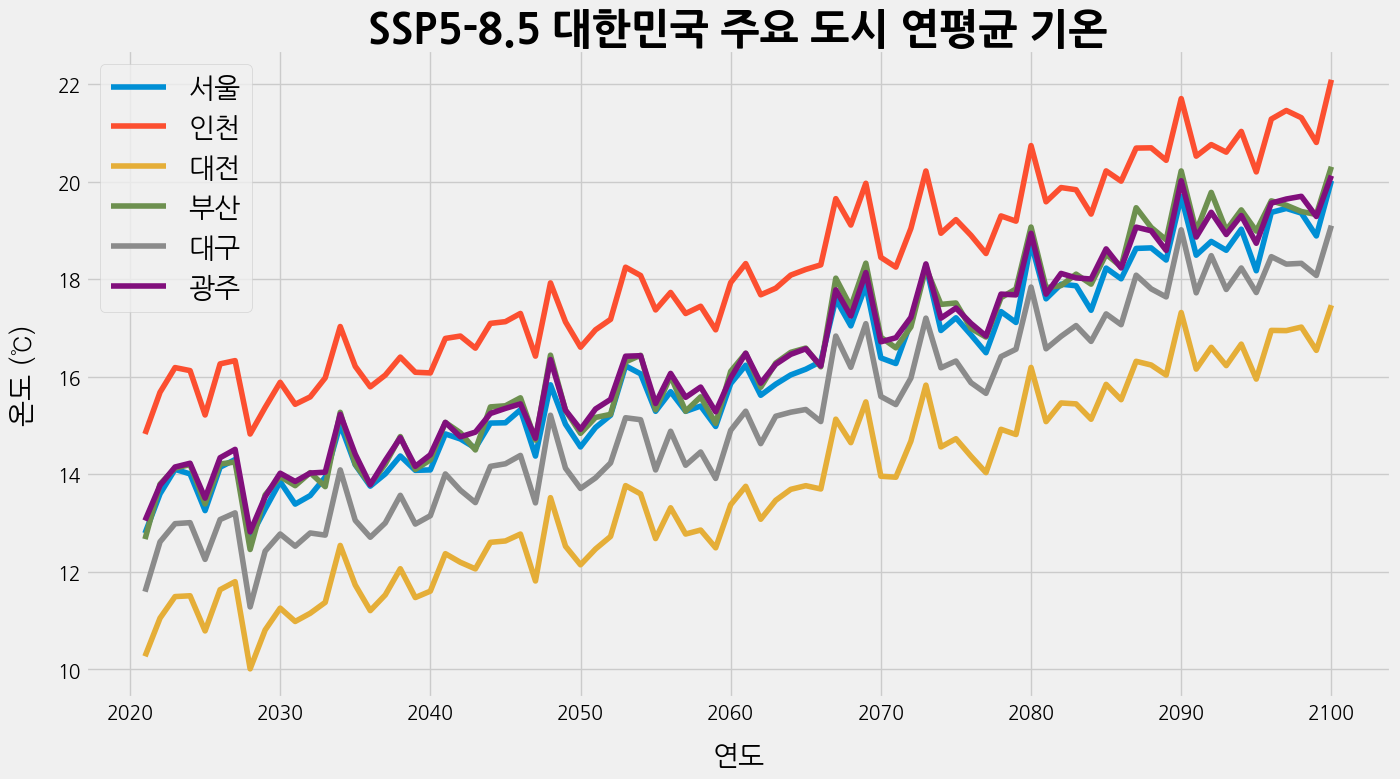

In [26]:
# Change plot style
plt.style.use('fivethirtyeight')
# plt.style.use('default') # default style

plt.figure(figsize=(15, 8))

plt.plot(time, seoul_mean_temp, label='서울')
plt.plot(time, incheon_mean_temp, label='인천')
plt.plot(time, daejeon_mean_temp, label='대전')
plt.plot(time, busan_mean_temp, label='부산')
plt.plot(time, daegu_mean_temp, label='대구')
plt.plot(time, gwangju_mean_temp, label='광주')

plt.title('SSP5-8.5 대한민국 주요 도시 연평균 기온', fontweight='bold', fontsize=30)
plt.xlabel('연도', fontsize=20, labelpad=15)
plt.ylabel('온도 (℃)',fontsize=20, labelpad=15)
plt.legend(fontsize=20)

save_path = base_FP + '/SSP5/SSP5_8.5_city_temp.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

## 6. Create GIF file

### 6.1 Single data

In [151]:
# Change plot style
plt.style.use('fivethirtyeight')
# plt.style.use('default') # default style

fig=plt.figure(figsize=(10,6))

def animate(i):
    x = time[:i+1]
    y1 = seoul_mean_temp[:i+1]
    plt.cla()
    plt.plot(x, y1, label='Seoul', lw=2)
    plt.title('SSP5-8.5 Average Annual Temperature', fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Temperature (℃)')
    plt.legend(loc='upper left', fontsize='10')
    plt.tight_layout()

ani = FuncAnimation(plt.gcf(), animate, frames=200, interval=100)
ani.save('./animation_single.gif', fps=20)
plt.show()

<Figure size 1000x600 with 0 Axes>

### 6.2 Multiple data

GIF_make_finish


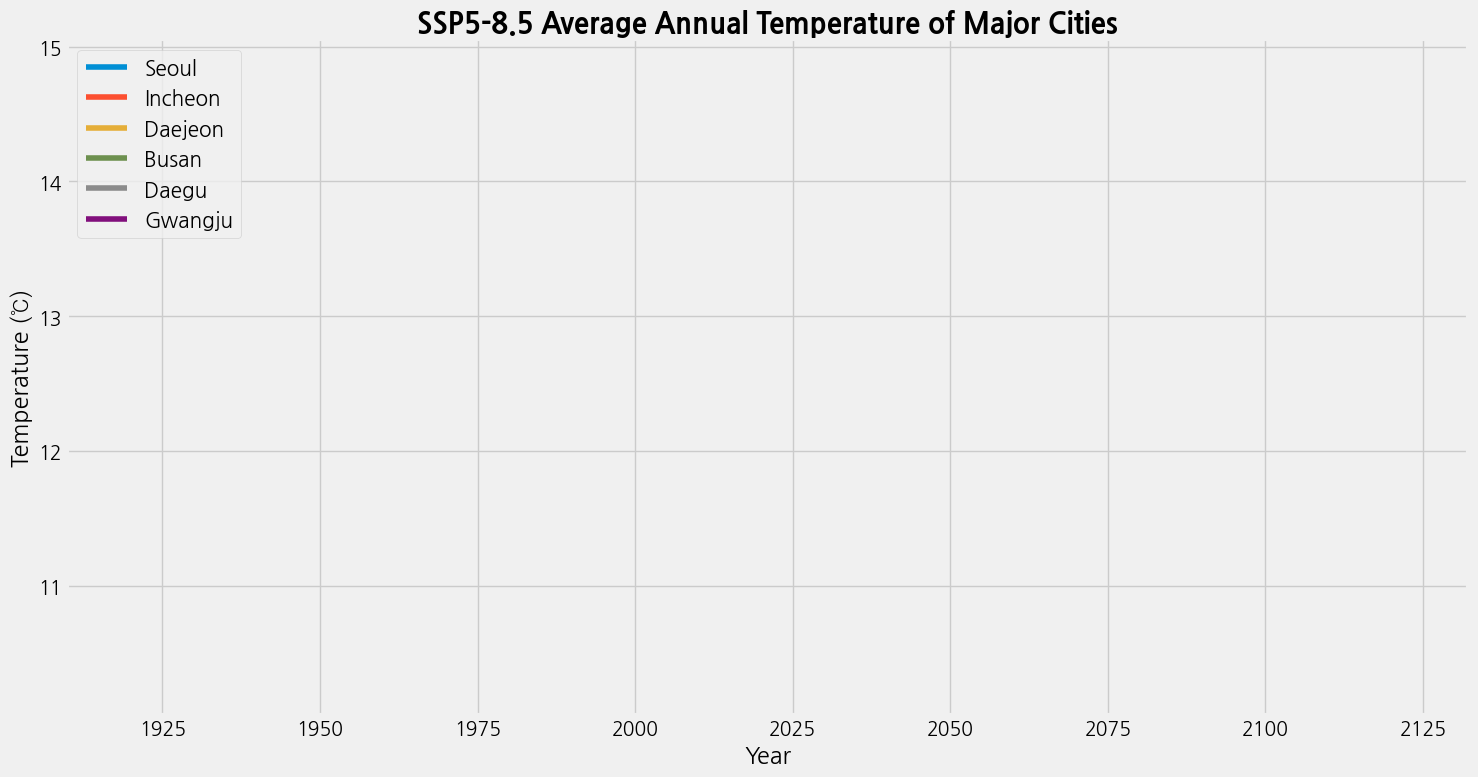

In [142]:
# Change plot style
plt.style.use('fivethirtyeight')
# plt.style.use('default') # default style

fig=plt.figure(figsize=(15,8))

def animate(i):
    x = year_time[:i+1]
    y1 = seoul_mean_temp[:i+1]
    y2 = incheon_mean_temp[:i+1]
    y3 = daejeon_mean_temp[:i+1]
    y4 = busan_mean_temp[:i+1]
    y5 = daegu_mean_temp[:i+1]
    y6 = gwangju_mean_temp[:i+1]
    
    plt.cla()
    plt.plot(x, y1, label='Seoul')
    plt.plot(x, y2, label='Incheon')
    plt.plot(x, y3, label='Daejeon')
    plt.plot(x, y4, label='Busan')
    plt.plot(x, y5, label='Daegu')
    plt.plot(x, y6, label='Gwangju')
    plt.title('SSP5-8.5 Average Annual Temperature of Major Cities', fontweight='bold')
    plt.ylabel('Temperature (℃)')
    plt.xlabel('Year')
    plt.legend(loc='upper left', fontsize='15')
    plt.tight_layout()
    
ani = FuncAnimation(plt.gcf(), animate, frames=200, interval=100)
ani.save('./animation_multi.gif', fps=20)
print('GIF_make_finish')